In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import LinearRegression

In [123]:
data = pd.read_excel('C:/Users/DELL/Desktop/Superstore.xlsx')

In [124]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [125]:
furniture = data.loc[data['Category']== 'Furniture']

In [126]:
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [127]:
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [128]:
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [129]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)

In [130]:
furniture = furniture.sort_values('Order Date')

In [131]:
furniture.isnull().sum()


Order Date    0
Sales         0
dtype: int64

In [132]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [133]:
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [134]:
furniture = furniture.set_index('Order Date')

In [135]:
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [136]:
furniture

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [137]:
y = furniture['Sales'].resample('MS').mean()

In [138]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

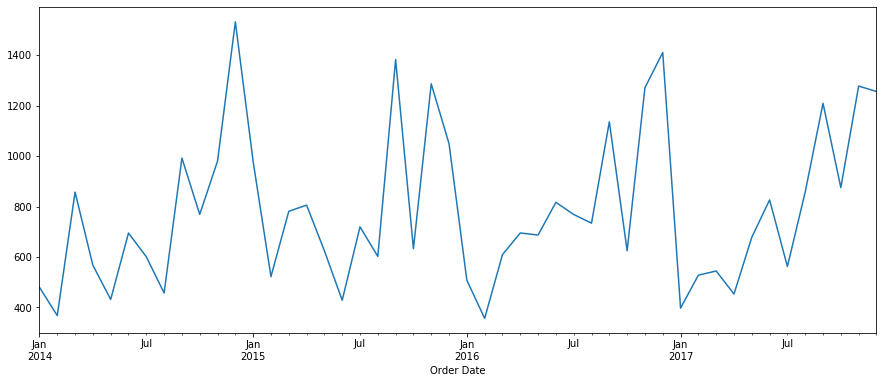

In [139]:
y.plot(figsize=(15, 6))
plt.show()

In [140]:
# Rolling Statistics 
rollmean = y.rolling(window =12).mean()
rollstd = y.rolling(window =12).std()
print(rollmean,rollstd)



Order Date
2014-01-01           NaN
2014-02-01           NaN
2014-03-01           NaN
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01           NaN
2014-08-01           NaN
2014-09-01           NaN
2014-10-01           NaN
2014-11-01           NaN
2014-12-01    727.716160
2015-01-01    769.227346
2015-02-01    782.099352
2015-03-01    775.761427
2015-04-01    795.622644
2015-05-01    811.701604
2015-06-01    789.493792
2015-07-01    799.371860
2015-08-01    811.446056
2015-09-01    843.982499
2015-10-01    832.646228
2015-11-01    858.186217
2015-12-01    817.940975
2016-01-01    778.762175
2016-02-01    764.968226
2016-03-01    750.663173
2016-04-01    741.459023
2016-05-01    746.648067
2016-06-01    779.010171
2016-07-01    783.096012
2016-08-01    794.087327
2016-09-01    773.517550
2016-10-01    772.841908
2016-11-01    771.562224
2016-12-01    801.675924
2017-01-01    792.460862
2017-02-01    806.736823
2017-03-01    801.328192
2017-04-01    

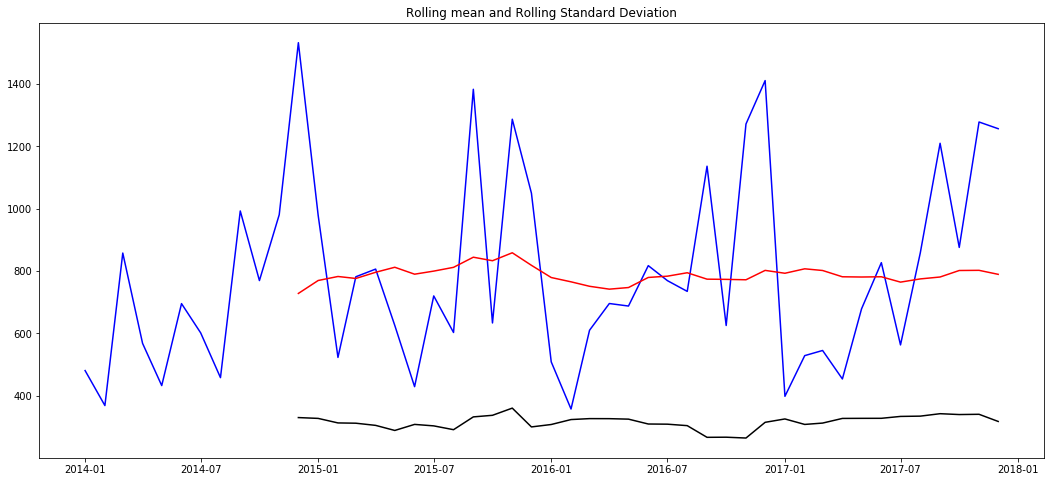

In [141]:
# Plotting rolling statistics
plt.plot(y,color='blue',label='original')
plt.plot(rollmean,color='red',label='rolling mean')
plt.plot(rollstd,color='black',label='rolling std')
plt.title('Rolling mean and Rolling Standard Deviation')
plt.show()

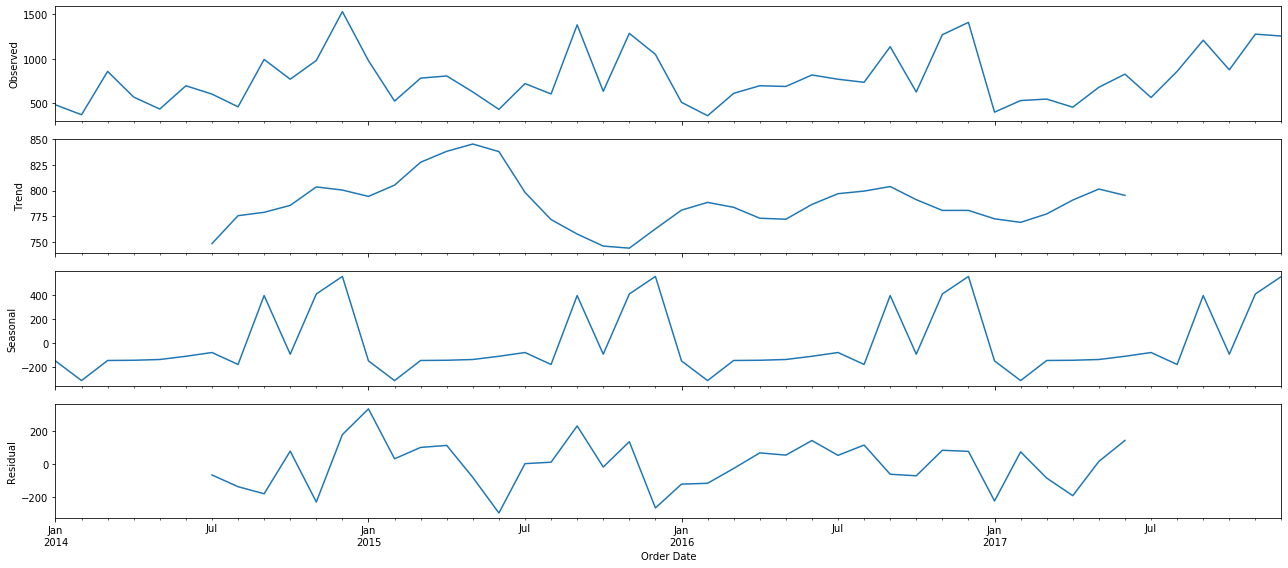

In [142]:
from pylab import rcParams
rcParams['figure.figsize']= 18,8
decomposition = sm.tsa.seasonal_decompose(y,model='additive')
fig = decomposition.plot()
plt.show()

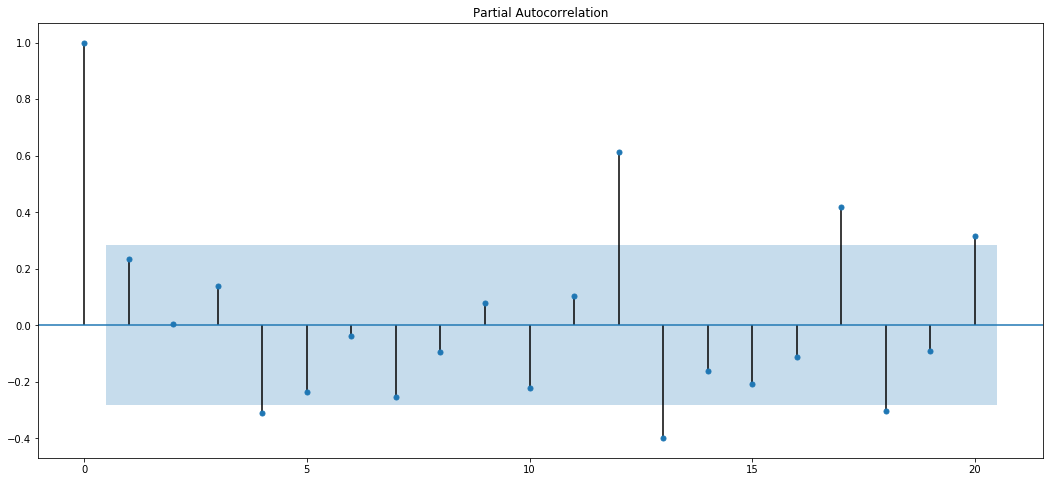

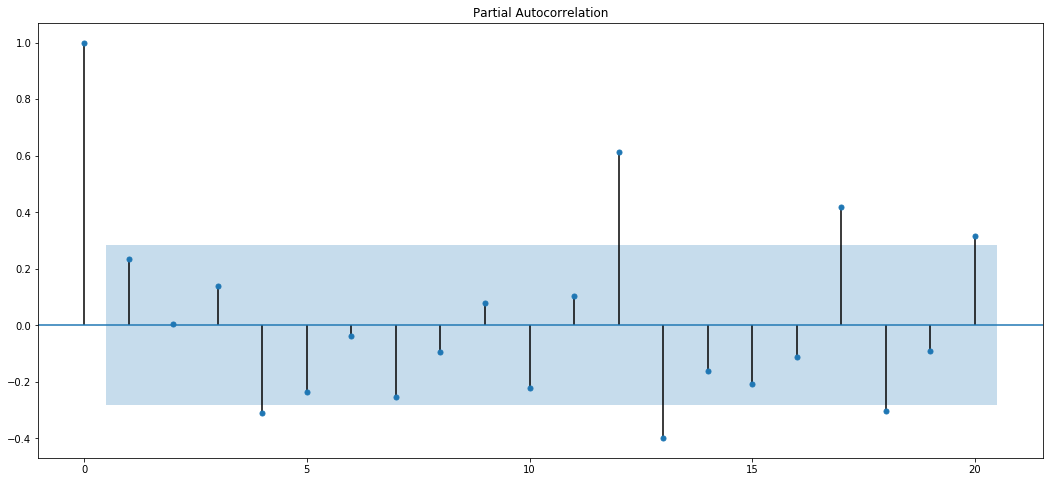

In [143]:
plot_pacf(y,lags=20)

In [144]:
y.shape

(48,)

In [145]:
y = y.to_frame()

In [146]:
y

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


In [147]:
y['Sales_TwelfthLag'] = y['Sales'].shift(12,axis=0)

In [148]:
y.head(14)

,Sales,Sales_TwelfthLag
Order Date,,
2014-01-01,480.194231,NaN
2014-02-01,367.931600,NaN
2014-03-01,857.291529,NaN
2014-04-01,567.488357,NaN
2014-05-01,432.049188,NaN
2014-06-01,695.059242,NaN
2014-07-01,601.169500,NaN
2014-08-01,457.521656,NaN
2014-09-01,992.353367,NaN


In [149]:
y.dropna(inplace=True)

In [150]:
y.head()

,Sales,Sales_TwelfthLag
Order Date,,
2015-01-01,978.328467,480.194231
2015-02-01,522.395667,367.931600
2015-03-01,781.236437,857.291529
2015-04-01,805.822962,567.488357
2015-05-01,624.996700,432.049188


In [154]:
Y = y.Sales.values
X = y.Sales_TwelfthLag.values

In [155]:
train_size = int(len(X)*0.80)

In [160]:
X_train,X_test = X[0:train_size],X[train_size:len(X)]
Y_train,Y_test = Y[0:train_size],Y[train_size:len(X)]


In [161]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


In [162]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
regressor.coef_

array([0.6487655])

In [164]:
regressor.intercept_

282.7894764121384

In [165]:
Y_pred = regressor.predict(X_test)

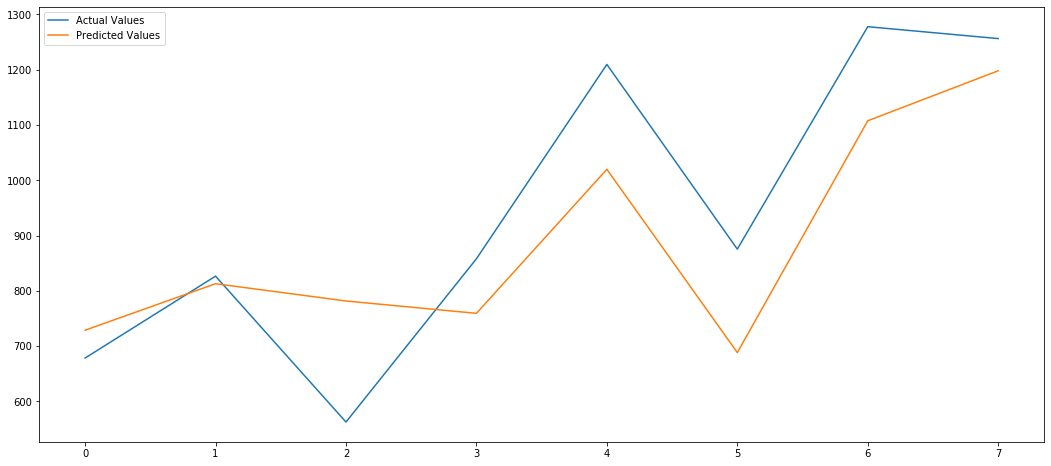

In [166]:
plt.plot(Y_test[-10:],label = 'Actual Values')
plt.plot(Y_pred[-10:],label = 'Predicted Values')
plt.legend()
plt.show()

In [167]:
model = ARIMA(Y_train,order=(1,0,0))

In [168]:
model_fit = model.fit()

In [169]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   28
Model:                     ARMA(1, 0)   Log Likelihood                -199.014
Method:                       css-mle   S.D. of innovations            295.477
Date:                Wed, 24 Jun 2020   AIC                            404.027
Time:                        18:03:52   BIC                            408.024
Sample:                             0   HQIC                           405.249
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        762.5549     60.120     12.684      0.000     644.721     880.389
ar.L1.y        0.0738      0.191      0.387      0.702      -0.300       0.447
                                    Roots           